<a href="https://colab.research.google.com/github/worldart/worldart_jupyternotebook/blob/main/632M1L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# 1. The original Google Drive sharing link
gdrive_link = "https://drive.google.com/file/d/1ASg4qSm1fQ1U0uWSBrledIZuCFsDxOqb/view?usp=drive_link"

# 2. Extract the unique File ID from the link
# The file ID is the long string between '/d/' and '/view'
file_id = gdrive_link.split('/d/')[1].split('/view')[0]

# 3. Construct the direct download URL
# This special format allows pandas to download the file content directly.
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

# 4. Read the CSV using the direct download URL
try:
    df = pd.read_csv(download_url)
    print("DataFrame successfully loaded. First 5 rows:")
    print(df.head())

except Exception as e:
    print(f"Failed to load CSV. Ensure the file is set to 'Anyone with the link can view'. Error: {e}")

DataFrame successfully loaded. First 5 rows:
   loan_applicant_id  age          education  years_with_current_employer  \
0                191   44  university.degree                           10   
1              34318   34        high.school                            3   
2              14932   45  university.degree                           14   
3               2776   33         illiterate                           12   
4              11915   20              basic                            4   

   years_at_current_address  household_income  debt_to_income_ratio  \
0                        20               192             12.116645   
1                        18                57             14.264229   
2                        24               212              7.285681   
3                         5               418             11.386272   
4                        19               122             28.418494   

   credit_card_debt  other_debt  y  
0         14.377313    8.886

In [13]:
df

,loan_applicant_id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
0,191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1
1,34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0
2,14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0
3,2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1
4,11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0
...,...,...,...,...,...,...,...,...,...,...
41183,33354,49,high.school,4,4,114,12.296137,4.868954,9.148643,0
41184,38993,52,professional.course,13,16,178,21.421341,23.210634,14.919353,0
41185,1765,42,university.degree,18,15,264,9.821804,12.290464,13.639099,1
41186,32593,21,university.degree,12,24,56,23.998647,8.108453,5.330789,0


In [14]:
cat_vars = ["education"]
for var in cat_vars:
    cat_list = "var" + "_" + var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1 = df.join(cat_list)
    df = data1
cat_vars = ["education"]
data_vars = df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [15]:
df_final = df[to_keep]
df_final.drop(["loan_applicant_id"], axis=1, inplace=True)
df

/tmp/ipython-input-2151864955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(["loan_applicant_id"], axis=1, inplace=True)


,loan_applicant_id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1,False,False,False,False,True
1,34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0,False,True,False,False,False
2,14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0,False,False,False,False,True
3,2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1,False,False,True,False,False
4,11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,33354,49,high.school,4,4,114,12.296137,4.868954,9.148643,0,False,True,False,False,False
41184,38993,52,professional.course,13,16,178,21.421341,23.210634,14.919353,0,False,False,False,True,False
41185,1765,42,university.degree,18,15,264,9.821804,12.290464,13.639099,1,False,False,False,False,True
41186,32593,21,university.degree,12,24,56,23.998647,8.108453,5.330789,0,False,False,False,False,True


In [16]:
X, y = (
    df_final.loc[:, df_final.columns != "y"],
    df_final.loc[:, df_final.columns == "y"],
)
print(X.shape, y.shape)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=int(len(y) * 0.5), shuffle=False
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(41188, 12) (41188, 1)
(20594, 12) (20594, 12) (20594, 1) (20594, 1)


In [17]:
print(df_final["y"].value_counts())
print(
    "Percentage of default: ",
    100
    * df_final["y"].value_counts()[1]
    / (df_final["y"].value_counts()[0] + df_final["y"].value_counts()[1]),
)

y
0    36548
1     4640
Name: count, dtype: int64
Percentage of default:  11.26541711178013


In [18]:
X.describe()

,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,38.007842,13.549869,15.385331,139.707366,16.224054,9.577260,13.758168
std,10.623627,8.145105,9.184471,81.688037,9.191426,12.408628,14.596510
min,20.000000,0.000000,0.000000,14.000000,0.400386,0.005668,0.021759
25%,29.000000,6.000000,7.000000,74.000000,8.452497,1.853292,3.783906
50%,38.000000,14.000000,15.000000,134.000000,16.105334,5.311447,9.153871
75%,47.000000,21.000000,23.000000,196.000000,23.730786,12.636789,18.906855
max,56.000000,29.000000,31.000000,446.000000,41.293984,149.015859,159.198221


In [19]:
print(X.skew())

age                              0.002447
years_with_current_employer      0.014698
years_at_current_address         0.004061
household_income                 0.759520
debt_to_income_ratio             0.147856
credit_card_debt                 3.279096
other_debt                       2.558272
education_basic                  1.503777
education_high.school            1.515428
education_illiterate             1.511024
education_professional.course    1.501117
education_university.degree      1.469400
dtype: float64


In [20]:
print(X.kurt())

age                              -1.205963
years_with_current_employer      -1.191823
years_at_current_address         -1.198518
household_income                  0.910701
debt_to_income_ratio             -0.874766
credit_card_debt                 16.974074
other_debt                       10.951167
education_basic                   0.261359
education_high.school             0.296537
education_illiterate              0.283207
education_professional.course     0.253365
education_university.degree       0.159144
dtype: float64


/tmp/ipython-input-1349209378.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(X_train.keys(), rotation=90)


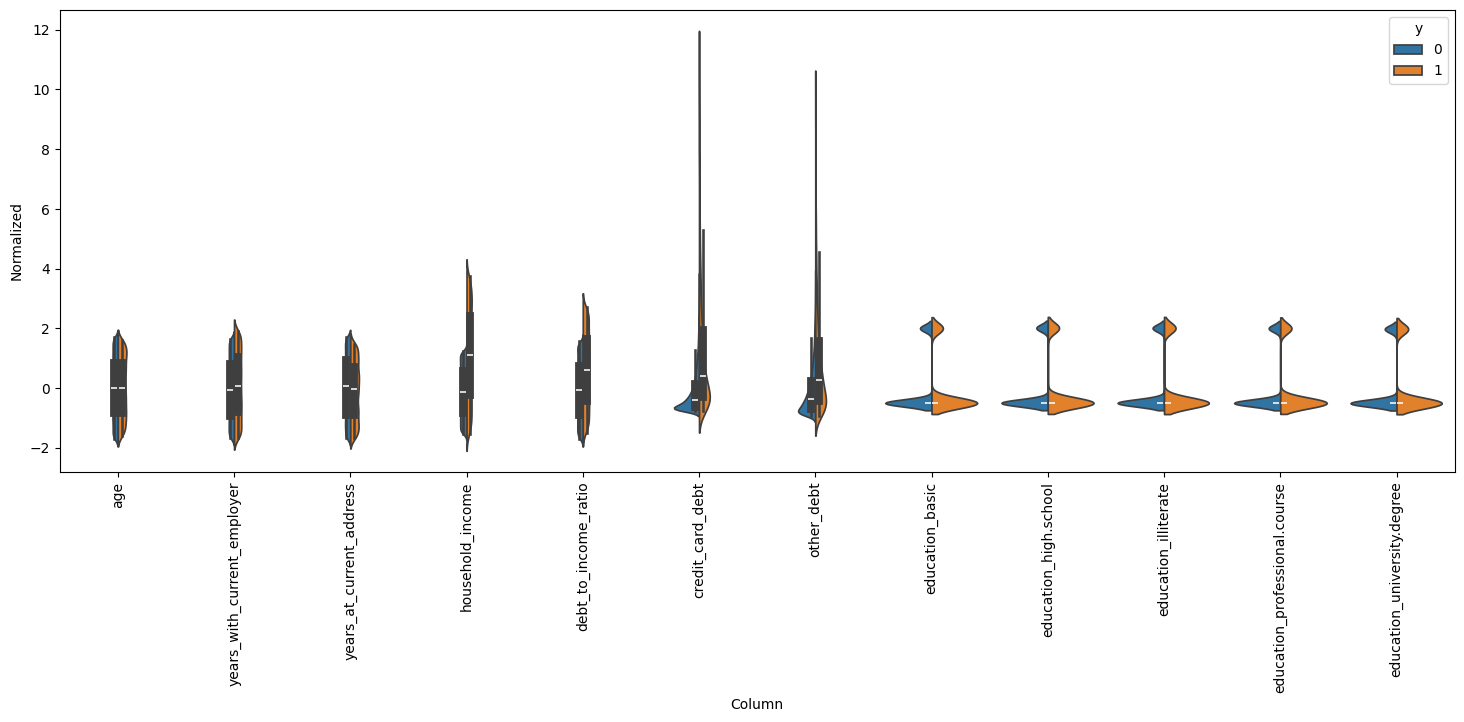

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

X_mean = X.mean()
X_std = X.std()
X_std = (X - X_mean) / X_std
X_std["y"] = y
X_std = X_std.melt(id_vars=["y"], var_name="Column", value_name="Normalized")
plt.figure(figsize=(18, 6))
ax = sns.violinplot(data=X_std, x="Column", y="Normalized", hue="y", split=True)
_ = ax.set_xticklabels(X_train.keys(), rotation=90)

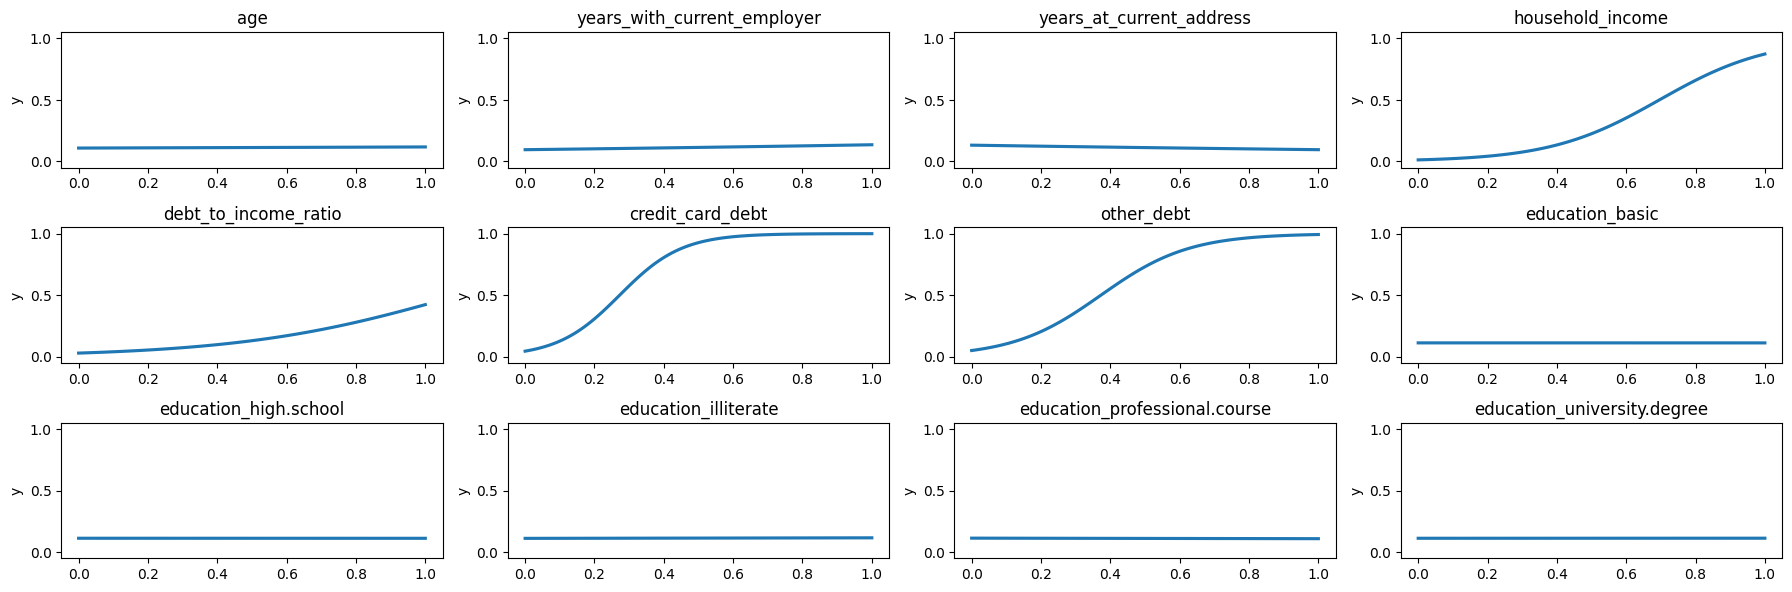

In [24]:
X_numeric = X.astype(float)
X_minmax = (X_numeric - X_numeric.min()) / (X_numeric.max() - X_numeric.min())
X_minmax["y"] = y
plt.figure(figsize=(18, 6))
g = 1
for colname in X:
    plt.subplot(3, 4, g)
    sns.regplot(
        x=colname,
        y="y",
        data=X_minmax,
        marker="",
        logistic=True,
        fit_reg=True,
        ci=None,
        label=colname,
    )
    plt.title(colname, fontsize="large")
    plt.xlabel("")
    g += 1
    # sns.lmplot(x=colname, y='y', data=X_minmax, markers = "", logistic = True, fit_reg=True, ci=None)
fig = plt.gcf()
fig.tight_layout(pad=1.0)
plt.show()

In [25]:
X.corr()

,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
age,1.000000,0.003541,-0.000792,0.012941,0.002368,0.006742,0.008382,-0.003840,0.000901,0.000125,0.006015,-0.003176
years_with_current_employer,0.003541,1.000000,0.003735,0.017895,0.015861,0.021350,0.019016,-0.005973,0.002197,-0.004079,0.005609,0.002223
years_at_current_address,-0.000792,0.003735,1.000000,-0.015017,-0.016278,-0.016825,-0.015577,-0.000705,-0.003808,0.002134,-0.004052,0.006376
household_income,0.012941,0.017895,-0.015017,1.000000,0.089134,0.570904,0.602902,-0.000379,-0.000497,0.001665,-0.009651,0.008798
debt_to_income_ratio,0.002368,0.015861,-0.016278,0.089134,1.000000,0.512834,0.587590,0.001945,-0.001682,0.002517,-0.004673,0.001881
credit_card_debt,0.006742,0.021350,-0.016825,0.570904,0.512834,1.000000,0.381699,0.001841,-0.002588,0.002742,-0.009434,0.007381
other_debt,0.008382,0.019016,-0.015577,0.602902,0.587590,0.381699,1.000000,-0.006141,0.000275,0.006983,-0.007343,0.006193
education_basic,-0.003840,-0.005973,-0.000705,-0.000379,0.001945,0.001841,-0.006141,1.000000,-0.248101,-0.248537,-0.249522,-0.252719
education_high.school,0.000901,0.002197,-0.003808,-0.000497,-0.001682,-0.002588,0.000275,-0.248101,1.000000,-0.247384,-0.248365,-0.251547
education_illiterate,0.000125,-0.004079,0.002134,0.001665,0.002517,0.002742,0.006983,-0.248537,-0.247384,1.000000,-0.248801,-0.251989


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler_input = MinMaxScaler(feature_range=(-1, 1))
scaler_input.fit(X_train)
X_train = scaler_input.transform(X_train)
X_test = scaler_input.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

# parameters not specified, all are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [28]:
print(logisticRegr.intercept_)
for cc in range(len(X.keys())):
    print(X.keys()[cc], logisticRegr.coef_[0, cc])

[-1.11131243]
age 0.01081734671552601
years_with_current_employer 0.20470740951693106
years_at_current_address -0.17326649396194904
household_income 4.005289860582844
debt_to_income_ratio 2.3613391856730552
credit_card_debt -0.5282834691155274
other_debt -2.4483831464794332
education_basic 0.6213375492611574
education_high.school 0.639841367593294
education_illiterate 0.6629364455633365
education_professional.course 0.639915002318845
education_university.degree 0.67544906605575


In [29]:
predictions = logisticRegr.predict(X_test)

In [30]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.9246382441487812


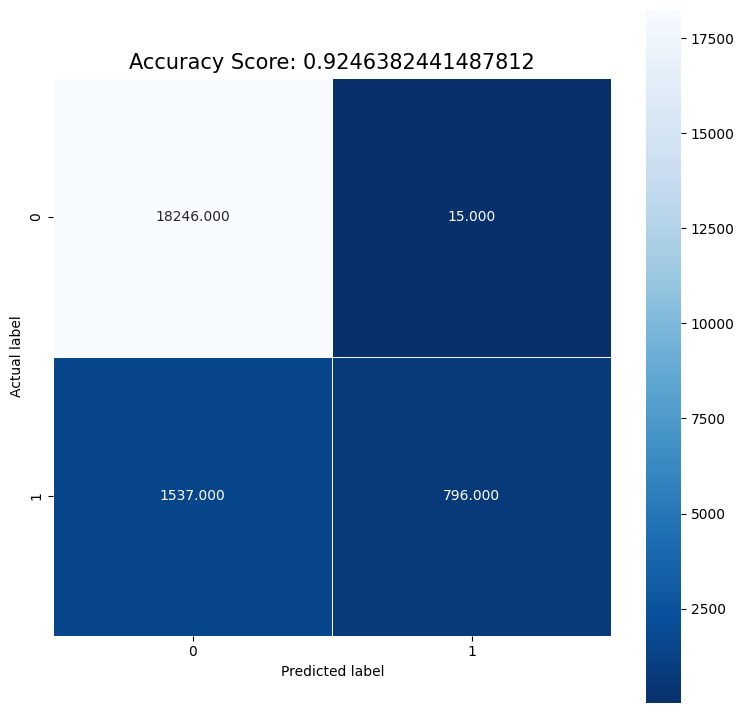

In [31]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15);

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     18261
           1       0.98      0.34      0.51      2333

    accuracy                           0.92     20594
   macro avg       0.95      0.67      0.73     20594
weighted avg       0.93      0.92      0.91     20594



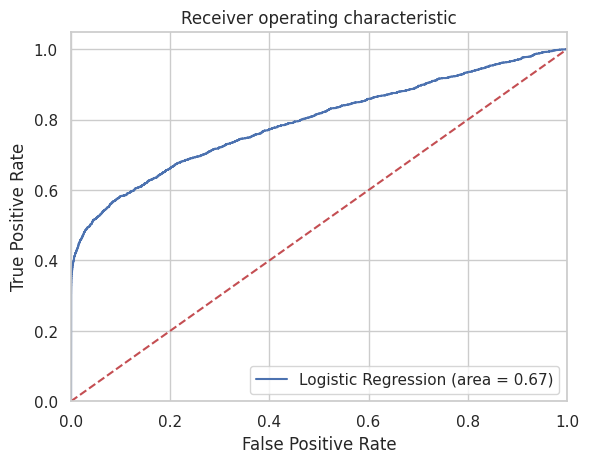

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve

sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2.33075968]
[[ 0.6610294   0.88932941 -0.56386759 -1.49182754  3.94889572  1.81288203
  -1.97320058 -0.90754896 -0.896997   -0.89578526 -0.89751358 -0.88951409
  -0.21970485 -1.02891903  0.60644523 -1.12110192 -7.18197306 -1.71630254
   1.42902699 -0.90754896 -0.896997   -0.89578526 -0.89751358 -0.88951409
  -0.23311812 -1.91710261  1.30963506  4.59298812 -2.74143799 -1.06935461
   0.38370253 -0.90754896 -0.896997   -0.89578526 -0.89751358 -0.88951409
  -0.07764072 -0.29045623  0.16881821  7.37452608  4.06343516 -1.07761314
  -0.54113529 -0.90754896 -0.896997   -0.89578526 -0.89751358 -0.88951409
  -0.20788325  3.32996546 -2.19194047  7.42406481  9.47695476 -1.22358712
  -1.02704002 -0.90754896 -0.896997   -0.89578526 -0.89751358 -0.88951409]]
0.9469262892104496
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18261
           1       1.00      0.53      0.69      2333

    accuracy                           0.95     20594
   macro

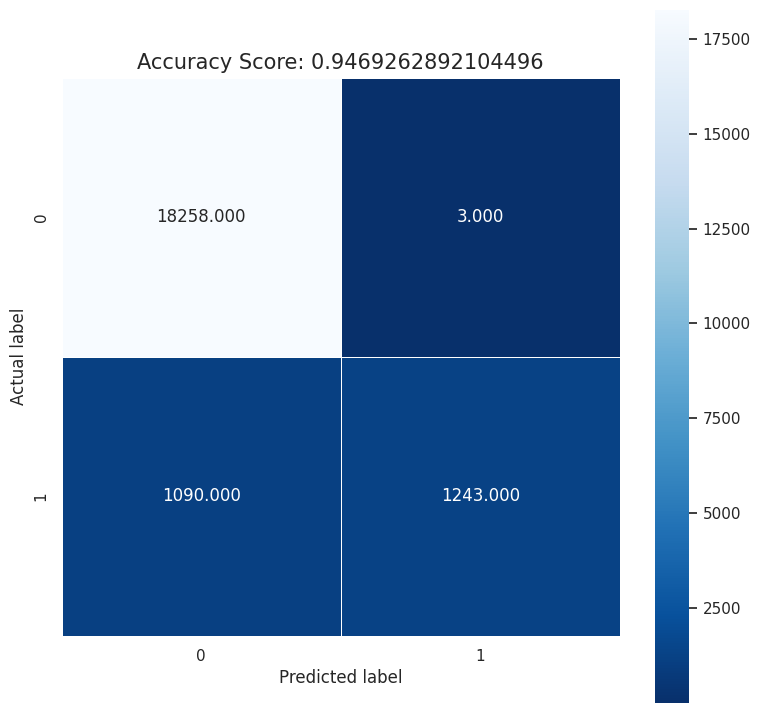

In [35]:
import numpy as np

# Redefine the input feature matrix to include powers of each feature
Xpoly = X
for pp in range(2, 6):
    Xpoly = np.concatenate((Xpoly, np.power(X, pp)), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    Xpoly, y, test_size=int(len(y) * 0.5), shuffle=False
)
# Scale the features
scaler_input = MinMaxScaler(feature_range=(-1, 1))
scaler_input.fit(X_train)
X_train = scaler_input.transform(X_train)
X_test = scaler_input.transform(X_test)
# Set up Logistic Regression
logisticRegr = LogisticRegression(C=2.5, max_iter=500)
logisticRegr.fit(X_train, y_train)
# Display coefficients
print(logisticRegr.intercept_)
print(logisticRegr.coef_)
# Compute accuracy
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)
# Display confusion matrix and other indicators
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15)
print(classification_report(y_test, predictions))

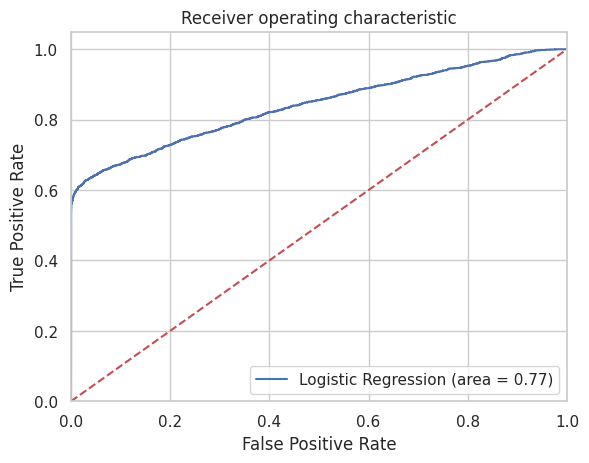

In [36]:
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()